In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
df = pd.read_csv('D3.csv')

In [97]:
df.head(100)

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


In [98]:
len(df)

100

In [129]:
x1 = df.values[:, 0]
x2 = df.values[:, 1]
x3 = df.values[:, 2]
y = df.values[:, 3]
m = len(y)
print('x =', x1[: 10])
print('y =', y[: 10])
print('m =', m)
len(x1)

x = [0.         0.04040404 0.08080808 0.12121212 0.16161616 0.2020202
 0.24242424 0.28282828 0.32323232 0.36363636]
y = [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472 3.81541972
 4.09119974 2.36371479 3.83296487 4.09894997]
m = 100


100

Text(0.5, 1.0, 'Scatter Plot of Training Data')

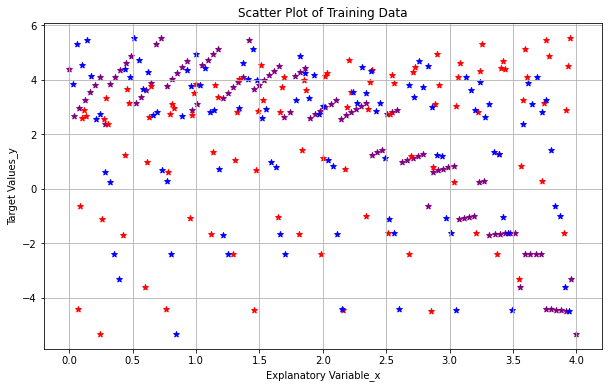

In [130]:
plt.scatter(x1, y, color = 'purple', marker = '*')
plt.scatter(x2, y, color = 'red', marker = '*')
plt.scatter(x3, y, color = 'blue', marker = '*')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Explanatory Variable_x')
plt.ylabel('Target Values_y')
plt.title('Scatter Plot of Training Data')

In [131]:
x_0 = np.ones((m, 1))
x_0[: 5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [132]:
x_1 = x1.reshape(m, 1)
x_1[: 5]

array([[0.        ],
       [0.04040404],
       [0.08080808],
       [0.12121212],
       [0.16161616]])

In [133]:
x_2 = x2.reshape(m, 1)
x_1[: 5]

array([[0.        ],
       [0.04040404],
       [0.08080808],
       [0.12121212],
       [0.16161616]])

In [134]:
x_3 = x3.reshape(m, 1)
x_1[: 5]

array([[0.        ],
       [0.04040404],
       [0.08080808],
       [0.12121212],
       [0.16161616]])

In [135]:
x = np.hstack((x_0, x_1, x_2, x_3))
x[: 5]

array([[1.        , 0.        , 3.44      , 0.44      ],
       [1.        , 0.04040404, 0.1349495 , 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545454],
       [1.        , 0.16161616, 2.21979798, 2.23393939]])

In [136]:
theta = np.zeros((4, 1))
theta

array([[0.],
       [0.],
       [0.],
       [0.]])

In [137]:
def compute_loss(x, y, theta):
   
    predictions = x.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)


    return J

In [138]:
loss = compute_loss(x, y, theta)
print('The loss for given values of theta_0, theta_1, theta_2 and theta_3 =', loss)

The loss for given values of theta_0, theta_1, theta_2 and theta_3 = 552.4438459196241


In [139]:
def gradient_descent(x, y, theta, alpha, iterations): 
     
    loss_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = x.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * x.transpose().dot(errors);
        theta = theta - sum_delta;
        loss_history[i] = compute_loss(x, y, theta)
        
    return theta, loss_history    

In [164]:
theta = [0, 0, 0, 0]
iterations = 5000;
alpha = 0.1;

In [165]:
theta, loss_history = gradient_descent (x, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('loss_history =', loss_history)

Final value of theta = [ 5.31416717 -2.00371927  0.53256334 -0.26560187]
loss_history = [4.13064348 3.51770697 3.12758306 ... 0.73846424 0.73846424 0.73846424]


Text(0.5, 1.0, 'Convergence of gradient descent')

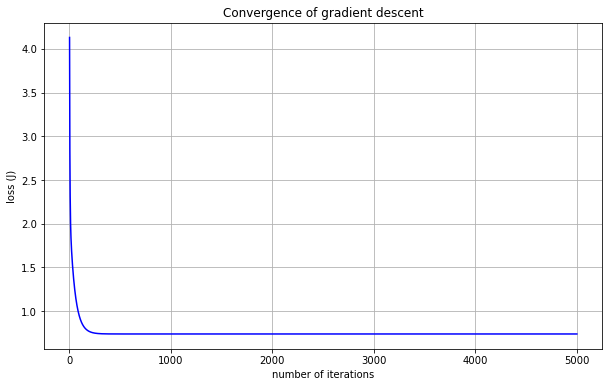

In [166]:
plt.plot(range(1, iterations + 1), loss_history, color = 'blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('number of iterations')
plt.ylabel('loss (J)')
plt.title('Convergence of gradient descent')